# 交互作用：出發時段跟航空公司

In [7]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 載入資料並刪除價格歷史為空的列
data = pd.read_csv('/Users/yuchingchen/Documents/專題/cleaned_data/tokyo.csv')

<Figure size 1200x600 with 0 Axes>

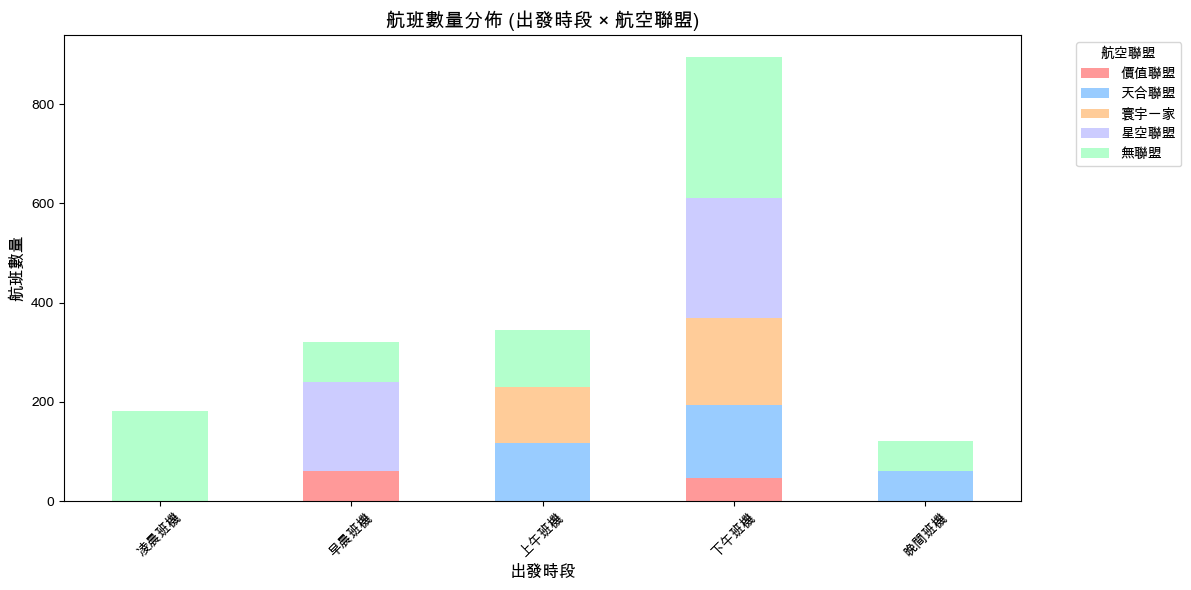

In [8]:
# 確保時段順序為固定排序
time_order = ["凌晨班機", "早晨班機", "上午班機", "下午班機", "晚間班機"]
data['出發時段'] = pd.Categorical(data['出發時段'], categories=time_order, ordered=True)

# 確認排序
plot_data = data.sort_values(by='出發時段')

# 聯盟對應字典
alliance_mapping = {
    1: '星空聯盟',
    2: '天合聯盟',
    3: '寰宇一家',
    4: '價值聯盟',
    0: '無聯盟'
}

# 替換航空聯盟數值為聯盟名稱
plot_data['航空聯盟'] = plot_data['航空聯盟'].replace(alliance_mapping)

# 設定 observed=False，保持目前行為
flight_count = plot_data.groupby(['出發時段', '航空聯盟'], observed=False).size().unstack(fill_value=0)

# 使用指定顏色調整柱狀圖
custom_colors = ['#FF9999', '#99CCFF', '#FFCC99', '#CCCCFF', '#B3FFCC']

# 繪製柱狀圖
plt.figure(figsize=(12, 6))
flight_count.plot(kind='bar', stacked=True, figsize=(12, 6), color=custom_colors)
plt.title("航班數量分佈 (出發時段 × 航空聯盟)", fontsize=14)
plt.xlabel("出發時段", fontsize=12)
plt.ylabel("航班數量", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="航空聯盟", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

# 修正後的對數轉換
plot_data['平均價格_log'] = data['平均價格'].apply(lambda x: None if x <= 0 else np.log(x))

# 移除缺失值
plot_data = plot_data.dropna(subset=['平均價格_log', '出發時段', '航空聯盟'])

# 建立 GLM 模型
formula = '平均價格_log ~ C(出發時段) * C(航空聯盟)'
glm_model = glm(formula, data=plot_data, family=sm.families.Gamma()).fit()

# 顯示模型摘要
glm_model_summary = glm_model.summary()
glm_model_summary

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               平均價格_log   No. Observations:                 1865
Model:                            GLM   Df Residuals:                     1851
Model Family:                   Gamma   Df Model:                           13
Link Function:           InversePower   Scale:                       0.0015838
Method:                          IRLS   Log-Likelihood:                -781.79
Date:                Wed, 01 Jan 2025   Deviance:                       2.9672
Time:                        20:23:19   Pearson chi2:                     3.03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.3610
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        2.647e+10   1.28e+10      2.072      0.038    1.44e+09    5.15e+10
C(出發時段)[T.早晨班機]                 -2.647e+10   1.28e+10     -2.072      0.038   -5.15e+10   -1.44e+09
C(出發時段)[T.上午班機]                 -2.735e+10   1.76e+10     -1.558      0.119   -6.18e+10    7.06e+09
C(出發時段)[T.下午班機]                 -2.647e+10   1.28e+10     -2.072      0.038   -5.15e+10   -1.44e+09
C(出發時段)[T.晚間班機]                 -7.802e+10    3.7e+10     -2.110      0.035    -1.5e+11   -5.56e+09
C(航空聯盟)[T.天合聯盟]                  3.922e+09   1.75e+10      0.224      0.823   -3.04e+10    3.82e+10
C(航空聯盟)[T.寰宇一家]                  -6.55e+09   3.71e+10     -0.177      0.860   -7.93e+10    6.62e+10
C(航空聯盟)[T.星空聯盟]                  1.342e+10   8.59e+09      1.563      0.118   -3.41e+09    3.03e+10
C(航空聯盟)[T.無聯盟]                  -2.647e+10   1.28e+10     -2.072      0.038   -5.15e+10   -1.44e+09
C(出發時段)[T.早晨班機]:C(航空聯盟)[T.天合聯盟]  1.565e+07    1.3e+07      1.202      0.229   -9.87e+06    4.12e+07
C(出發時段)[T.上午班機]:C(航空聯盟)[T.天合聯盟] -3.043e+09   2.84e+10     -0.107      0.915   -5.87e+10    5.26e+10
C(出發時段)[T.下午班機]:C(航空聯盟)[T.天合聯盟] -3.922e+09   1.75e+10     -0.224      0.823   -3.82e+10    3.04e+10
C(出發時段)[T.晚間班機]:C(航空聯盟)[T.天合聯盟]  4.763e+10   4.28e+10      1.114      0.265   -3.62e+10    1.31e+11
C(出發時段)[T.早晨班機]:C(航空聯盟)[T.寰宇一家]  -8.41e+06   1.43e+07     -0.590      0.555   -3.63e+07    1.95e+07
C(出發時段)[T.上午班機]:C(航空聯盟)[T.寰宇一家]  7.429e+09   3.51e+10      0.212      0.832   -6.14e+10    7.62e+10
C(出發時段)[T.下午班機]:C(航空聯盟)[T.寰宇一家]   6.55e+09   3.71e+10      0.177      0.860   -6.62e+10    7.93e+10
C(出發時段)[T.晚間班機]:C(航空聯盟)[T.寰宇一家]  7.779e-07   1.44e-05      0.054      0.957   -2.74e-05     2.9e-05
C(出發時段)[T.早晨班機]:C(航空聯盟)[T.星空聯盟] -1.342e+10   8.59e+09     -1.563      0.118   -3.03e+10    3.41e+09
C(出發時段)[T.上午班機]:C(航空聯盟)[T.星空聯盟] -1.209e-05   1.01e-05     -1.192      0.233    -3.2e-05    7.79e-06
C(出發時段)[T.下午班機]:C(航空聯盟)[T.星空聯盟] -1.342e+10   8.59e+09     -1.563      0.118   -3.03e+10    3.41e+09
C(出發時段)[T.晚間班機]:C(航空聯盟)[T.星空聯盟]  3.895e-07   2.35e-07      1.656      0.098   -7.16e-08    8.51e-07
C(出發時段)[T.早晨班機]:C(航空聯盟)[T.無聯盟]   2.647e+10   1.28e+10      2.072      0.038    1.44e+09    5.15e+10
C(出發時段)[T.上午班機]:C(航空聯盟)[T.無聯盟]   2.735e+10   1.76e+10      1.558      0.119   -7.06e+09    6.18e+10
C(出發時段)[T.下午班機]:C(航空聯盟)[T.無聯盟]   2.647e+10   1.28e+10      2.072      0.038    1.44e+09    5.15e+10
C(出發時段)[T.晚間班機]:C(航空聯盟)[T.無聯盟]   7.802e+10    3.7e+10      2.110      0.035    5.56e+09     1.5e+11
===================================================================================================
"""